In [5]:
from pyspark import SparkContext, SparkConf
import initspark

In [9]:
l_conf = SparkConf().setAppName("BabyNames3").setMaster("local")
sc = SparkContext(conf=l_conf)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=BabyNames3, master=local) created by __init__ at <ipython-input-3-05fa0f37c645>:2 

In [8]:
rdd = sc\
    .textFile("data/BabyNames/Baby18802017.csv")\
    .map(lambda x: x.split(","))\
    .cache()

In [4]:
rdd.count()

1957047

In [6]:
rdd.filter(lambda x: x[0] == "Peter").count()

233

In [7]:
rdd.filter(lambda x: x[0] == "Peter")\
    .filter(lambda x: x[3] == "2000")\
    .collect()

[['Peter', 'F', '6', '2000'], ['Peter', 'M', '3146', '2000']]

In [8]:
rdd\
    .filter(lambda x: x[0] == "Peter")\
    .map(lambda x: (x[3], x[2]))\
    .take(20)

[('1880', '496'),
 ('1967', '24'),
 ('1929', '25'),
 ('1956', '19'),
 ('1967', '8321'),
 ('1916', '13'),
 ('1943', '17'),
 ('1976', '34'),
 ('1929', '3216'),
 ('1882', '461'),
 ('1956', '11326'),
 ('1983', '37'),
 ('1943', '6877'),
 ('1881', '428'),
 ('1883', '450'),
 ('1884', '524'),
 ('1968', '30'),
 ('1976', '5446'),
 ('1930', '16'),
 ('1930', '3266')]

In [25]:
rddYearAndName = rdd\
    .filter(lambda x: x[0] == "Kevin")\
    .map(lambda x: (x[3], x[2]))


In [26]:
results = rddYearAndName.reduceByKey(lambda x, y: int(x) + int(y)).collect()

In [27]:
print(sorted(results))

[('1912', '9'), ('1913', '9'), ('1914', '12'), ('1915', '15'), ('1916', '18'), ('1917', '19'), ('1918', '21'), ('1919', '14'), ('1920', '24'), ('1921', '84'), ('1922', '71'), ('1923', '53'), ('1924', '50'), ('1925', '61'), ('1926', '46'), ('1927', '67'), ('1928', '68'), ('1929', '76'), ('1930', '84'), ('1931', '112'), ('1932', '121'), ('1933', '132'), ('1934', '151'), ('1935', '175'), ('1936', '153'), ('1937', '178'), ('1938', 252), ('1939', 278), ('1940', '298'), ('1941', 425), ('1942', '530'), ('1943', 644), ('1944', 601), ('1945', 704), ('1946', 1051), ('1947', 1564), ('1948', 2257), ('1949', 3323), ('1950', 4792), ('1951', 6397), ('1952', 7964), ('1953', 10076), ('1954', 15400), ('1955', 17221), ('1956', 21835), ('1957', 24354), ('1958', 24744), ('1959', 26860), ('1960', 28482), ('1961', 29001), ('1962', 28439), ('1963', 30740), ('1964', 29478), ('1965', 28306), ('1966', 25713), ('1967', 24729), ('1968', 23996), ('1969', 23691), ('1970', 27109), ('1971', 25004), ('1972', 22481), ('

### Aufgabe: Zeichne daraus einen Graphen!

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
results = rddYearAndName.reduceByKey(lambda x, y: int(x) + int(y)).collect()
#print (results)

In [30]:
results = sorted(results)
print(results)

[('1912', '9'), ('1913', '9'), ('1914', '12'), ('1915', '15'), ('1916', '18'), ('1917', '19'), ('1918', '21'), ('1919', '14'), ('1920', '24'), ('1921', '84'), ('1922', '71'), ('1923', '53'), ('1924', '50'), ('1925', '61'), ('1926', '46'), ('1927', '67'), ('1928', '68'), ('1929', '76'), ('1930', '84'), ('1931', '112'), ('1932', '121'), ('1933', '132'), ('1934', '151'), ('1935', '175'), ('1936', '153'), ('1937', '178'), ('1938', 252), ('1939', 278), ('1940', '298'), ('1941', 425), ('1942', '530'), ('1943', 644), ('1944', 601), ('1945', 704), ('1946', 1051), ('1947', 1564), ('1948', 2257), ('1949', 3323), ('1950', 4792), ('1951', 6397), ('1952', 7964), ('1953', 10076), ('1954', 15400), ('1955', 17221), ('1956', 21835), ('1957', 24354), ('1958', 24744), ('1959', 26860), ('1960', 28482), ('1961', 29001), ('1962', 28439), ('1963', 30740), ('1964', 29478), ('1965', 28306), ('1966', 25713), ('1967', 24729), ('1968', 23996), ('1969', 23691), ('1970', 27109), ('1971', 25004), ('1972', 22481), ('

In [31]:
x = []
y = []

for result in results:
    x.append(int(result[0]))
    y.append(int(result[1]))

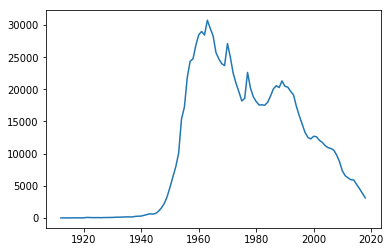

In [32]:
plt.plot(x, y)
plt.show()